# 탐색적 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

bird_strikes_df = pd.read_csv('bird_strikes2.csv')

In [2]:
plt.rcParams['font.family'] ='Malgun Gothic'

### 1. 운항에 미친 영향

In [3]:
bird_strikes_df["충돌영향"].head()

0         Engine Shut Down
1                     None
2                     None
3    Precautionary Landing
4                     None
Name: 충돌영향, dtype: object

In [4]:
bird_strikes_df["충돌영향"].value_counts()

None                     23351
Precautionary Landing     1121
Aborted Take-off           479
Other                      390
Engine Shut Down            88
Name: 충돌영향, dtype: int64

- 충돌영향이 None이 제일많음
- 충돌이 일어나도 아무런 영향이 없을 때가 많다는 의미임 

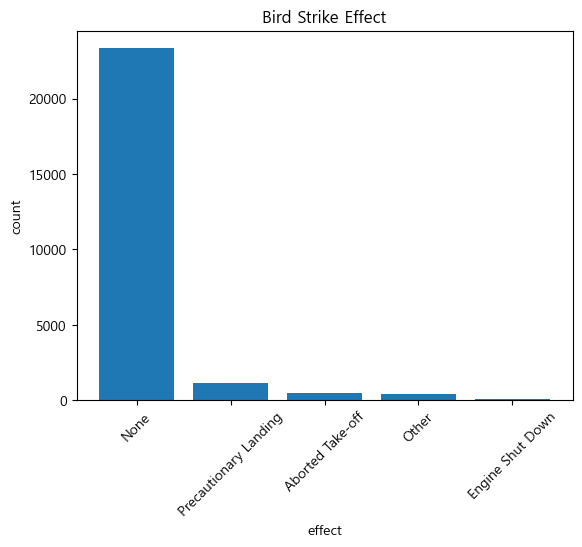

In [5]:
effect = bird_strikes_df["충돌영향"].value_counts()
plt.bar(effect.index, effect.values)
plt.title('Bird Strike Effect')
plt.xlabel('effect')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()


### 2. 운항 단계별 발생 현황

In [6]:
bird_strikes_df["운항단계"].value_counts()

Approach        10382
Landing Roll     5047
Take-off run     4711
Climb            4429
Descent           776
Taxi               74
Parked             10
Name: 운항단계, dtype: int64

* 단계
  - Approach: 진입
  - Landing Roll: 착륙
  - Take-off Run: 이륙  
  - Climb: 상승
  - Descent: 하강
  - Taxi: 활주
  - Parked: 주기 
* 지상에 있을 때 84건 이외는 공중에서 충돌 발생 

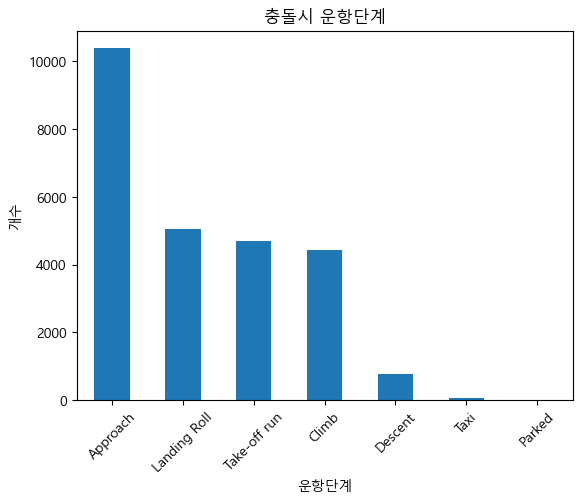

In [7]:
bird_strikes_df["운항단계"].value_counts().plot(kind='bar')
plt.title('충돌시 운항단계')
plt.xlabel('운항단계')
plt.ylabel('개수')
plt.xticks(rotation=45)
plt.show()

### 3. 부상자 현황

In [10]:
injured = bird_strikes_df["부상자수"].value_counts()
injured

0.0    25540
1.0       13
2.0        4
6.0        1
Name: 부상자수, dtype: int64

부상자 발생율 : 0.07%

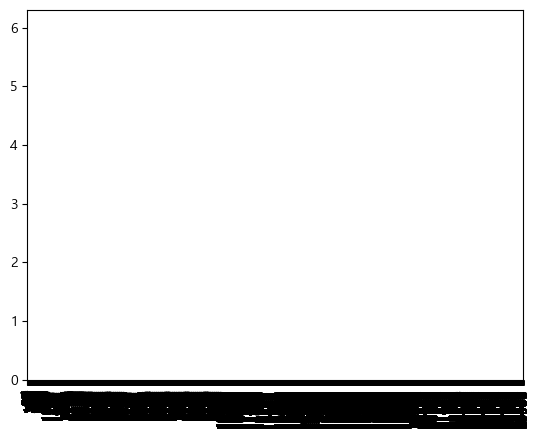

In [14]:
# 부상자수가 0인 데이터가 너무 많아 그래프 표현이 어려움
injured_df = bird_strikes_df["부상자수"]
injured_df.plot(kind='bar')
# plt.title('충돌시 부상자수')
# plt.xlabel('이벤트 수')
# plt.ylabel('부상자수')
plt.show()

* 운항 단계별 부상자 현황
  - Approach: 진입
  - Landing Roll: 착륙
  - Take-off Run: 이륙  
  - Climb: 상승
  - Descent: 하강
  - Taxi: 활주
  - Parked: 주기

In [16]:
# 부상자수가 0인 데이터를 제거하기 
def remove_rows_with_zero(csv_file1, csv_file2, column_name):
    df = pd.read_csv(csv_file1)
    df = df[df[column_name] != 0]
    df.to_csv(csv_file2, index=False)

In [17]:
csv_file1 = 'bird_strikes2.csv'
csv_file2 = 'bird_strikes3.csv'
column_name = '부상자수'
remove_rows_with_zero(csv_file1, csv_file2, column_name)

In [18]:
bird_strikes_df = pd.read_csv('bird_strikes3.csv')
injured = bird_strikes_df["부상자수"].value_counts()
injured

1.0    13
2.0     4
6.0     1
Name: 부상자수, dtype: int64

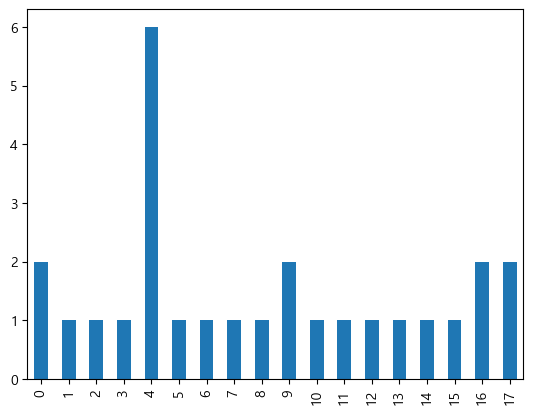

In [19]:
injured_df = bird_strikes_df["부상자수"]
injured_df.plot(kind='bar')
# plt.title('충돌시 부상자수')
# plt.xlabel('이벤트 수')
# plt.ylabel('부상자수')
plt.show()

###  4. 운항 단계별 부상자 현황

In [30]:
injured_phase = bird_strikes_df[['부상자수', '운항단계']]
injured_phase

,부상자수,운항단계
0,2.0,Landing Roll
1,1.0,Approach
2,1.0,Climb
3,1.0,Climb
4,6.0,Climb
5,1.0,Approach
6,1.0,NaN
7,1.0,NaN
8,1.0,Approach
9,2.0,Descent


In [28]:
i_flightphase = bird_strikes_df[['아이디', '부상자수', '운항단계']].dropna().groupby(['운항단계', '부상자수']).count().unstack()
i_flightphase

아이디          
부상자수          1.0  2.0  6.0
운항단계                       
Approach      5.0  NaN  NaN
Climb         4.0  1.0  1.0
Descent       NaN  1.0  NaN
Landing Roll  NaN  1.0  NaN

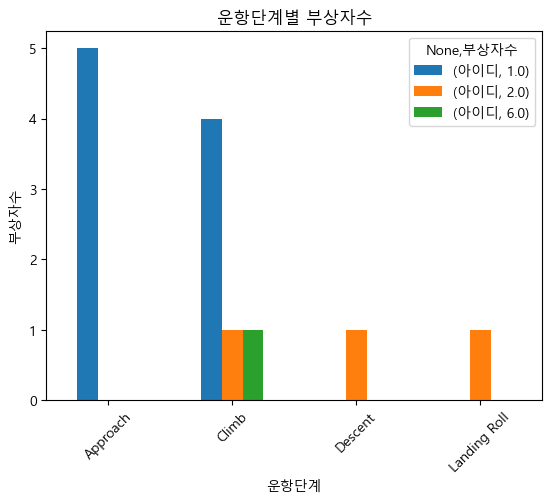

In [34]:
i_flightphase.plot(kind='bar', stacked=False)
plt.title('운항단계별 부상자수')
plt.xlabel('운항단계')
plt.ylabel('부상자수')
plt.xticks(rotation=45)
plt.show()

* Approach(진입): 부상자 발생 건 수 가장 많음(건 별 1명 부상)
* Climb(상승): 1건 발생, 6명 부상

### 5. 항공기 손상에 따른 부상자 현황

In [37]:
injured_damage = bird_strikes_df[['부상자수', '손상여부']]
injured_damage

,부상자수,손상여부
0,2.0,Caused damage
1,1.0,Caused damage
2,1.0,Caused damage
3,1.0,Caused damage
4,6.0,Caused damage
5,1.0,Caused damage
6,1.0,Caused damage
7,1.0,Caused damage
8,1.0,Caused damage
9,2.0,Caused damage


* 항공기가 손상되었을 때만 부상자 발생

### 6. 항공기 크기 별 손상

In [44]:
bird_strikes_df = pd.read_csv('bird_strikes2.csv')
bird_strikes_df['대형기여부'].value_counts()

False    17027
True      8402
Name: 대형기여부, dtype: int64

In [49]:
aircraftsize = bird_strikes_df[['충돌실제수','손상여부','대형기여부']].dropna().groupby(['대형기여부','손상여부']).count().unstack()
aircraftsize

충돌실제수          
손상여부  Caused damage No damage
대형기여부                        
False          1850     15177
True            604      7798

* 소형기 (False) : 17027건 발생 (손상률 13%)
* 대형기 (True) : 8402건 발생(손상률 8%)

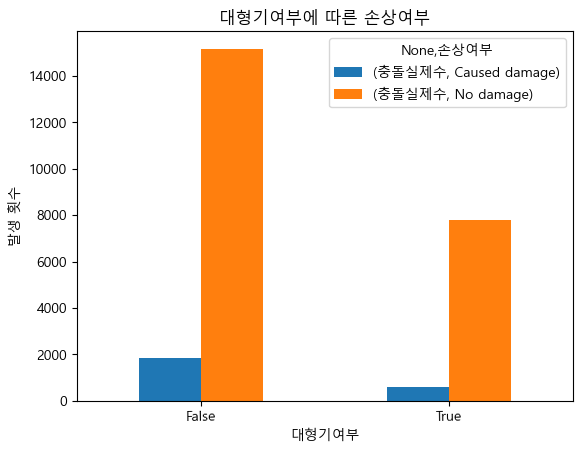

In [50]:
aircraftsize.plot(kind='bar', stacked=False)

plt.title('대형기여부에 따른 손상여부')
plt.xlabel('대형기여부')
plt.ylabel('발생 횟수')
plt.xticks(rotation=1)
plt.show()

### 7. 운항 단계별 항공기 손상